# 응용통계학 (12주차) 5월 19일
> GLM, 일반화선형모형 2번째

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics, GLM, 일반화 선형 모형]

In [4]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

# 일반화선형모형 : Generalized linear model II

이전 절에서는 binary response에 대해서 다루었다. binomial response 또한 비슷한 방식으로 다루어질 수 있다.

$Y_i$가 이항분포로써 $B(m_i,p_i), i=1,2,…,n$과 같이 분포한다고 가정하고 $q$개의 설명변수가 있다고 가정하자.

binary와 마찬가지로 다음과 같이 모형화 한다.

$$η_i=g(p_i)=β_0+β_1x_{i1}+⋯+β_qx_{qi}$$

> `Challenger` data : 1986년에 발사직후 폭발한 우주왕복선 챌린저호는 엔진상의 부품 중 O-ring에 문제가 있었던 것으로 밝혀졌다. 23회의 이번 mission에서 관측된 데이터가 기록되었다. 왕복선 내에는 총 6개의 O-ring 부품이 있으며 온도에 따라서 부품이상작동 확률이 변하는 것으로 알려져 있다. 발사 당시 온도는 31F로 기룩되었다.

$\chi_i \sim B(6,p_i), i=1,2,3$
- 6개 관측
- p는 정상작동확률

In [5]:
library(faraway)

In [6]:
data(orings, package="faraway")
t(orings)

,1,2,3,4,5,6,7,8,9,10,⋯,14,15,16,17,18,19,20,21,22,23
temp,53,57,58,63,66,67,67,67,68,69,⋯,70,72,73,75,75,76,76,78,79,81
damage,5,1,1,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


- 이상작동한 것이면 1씩 증가

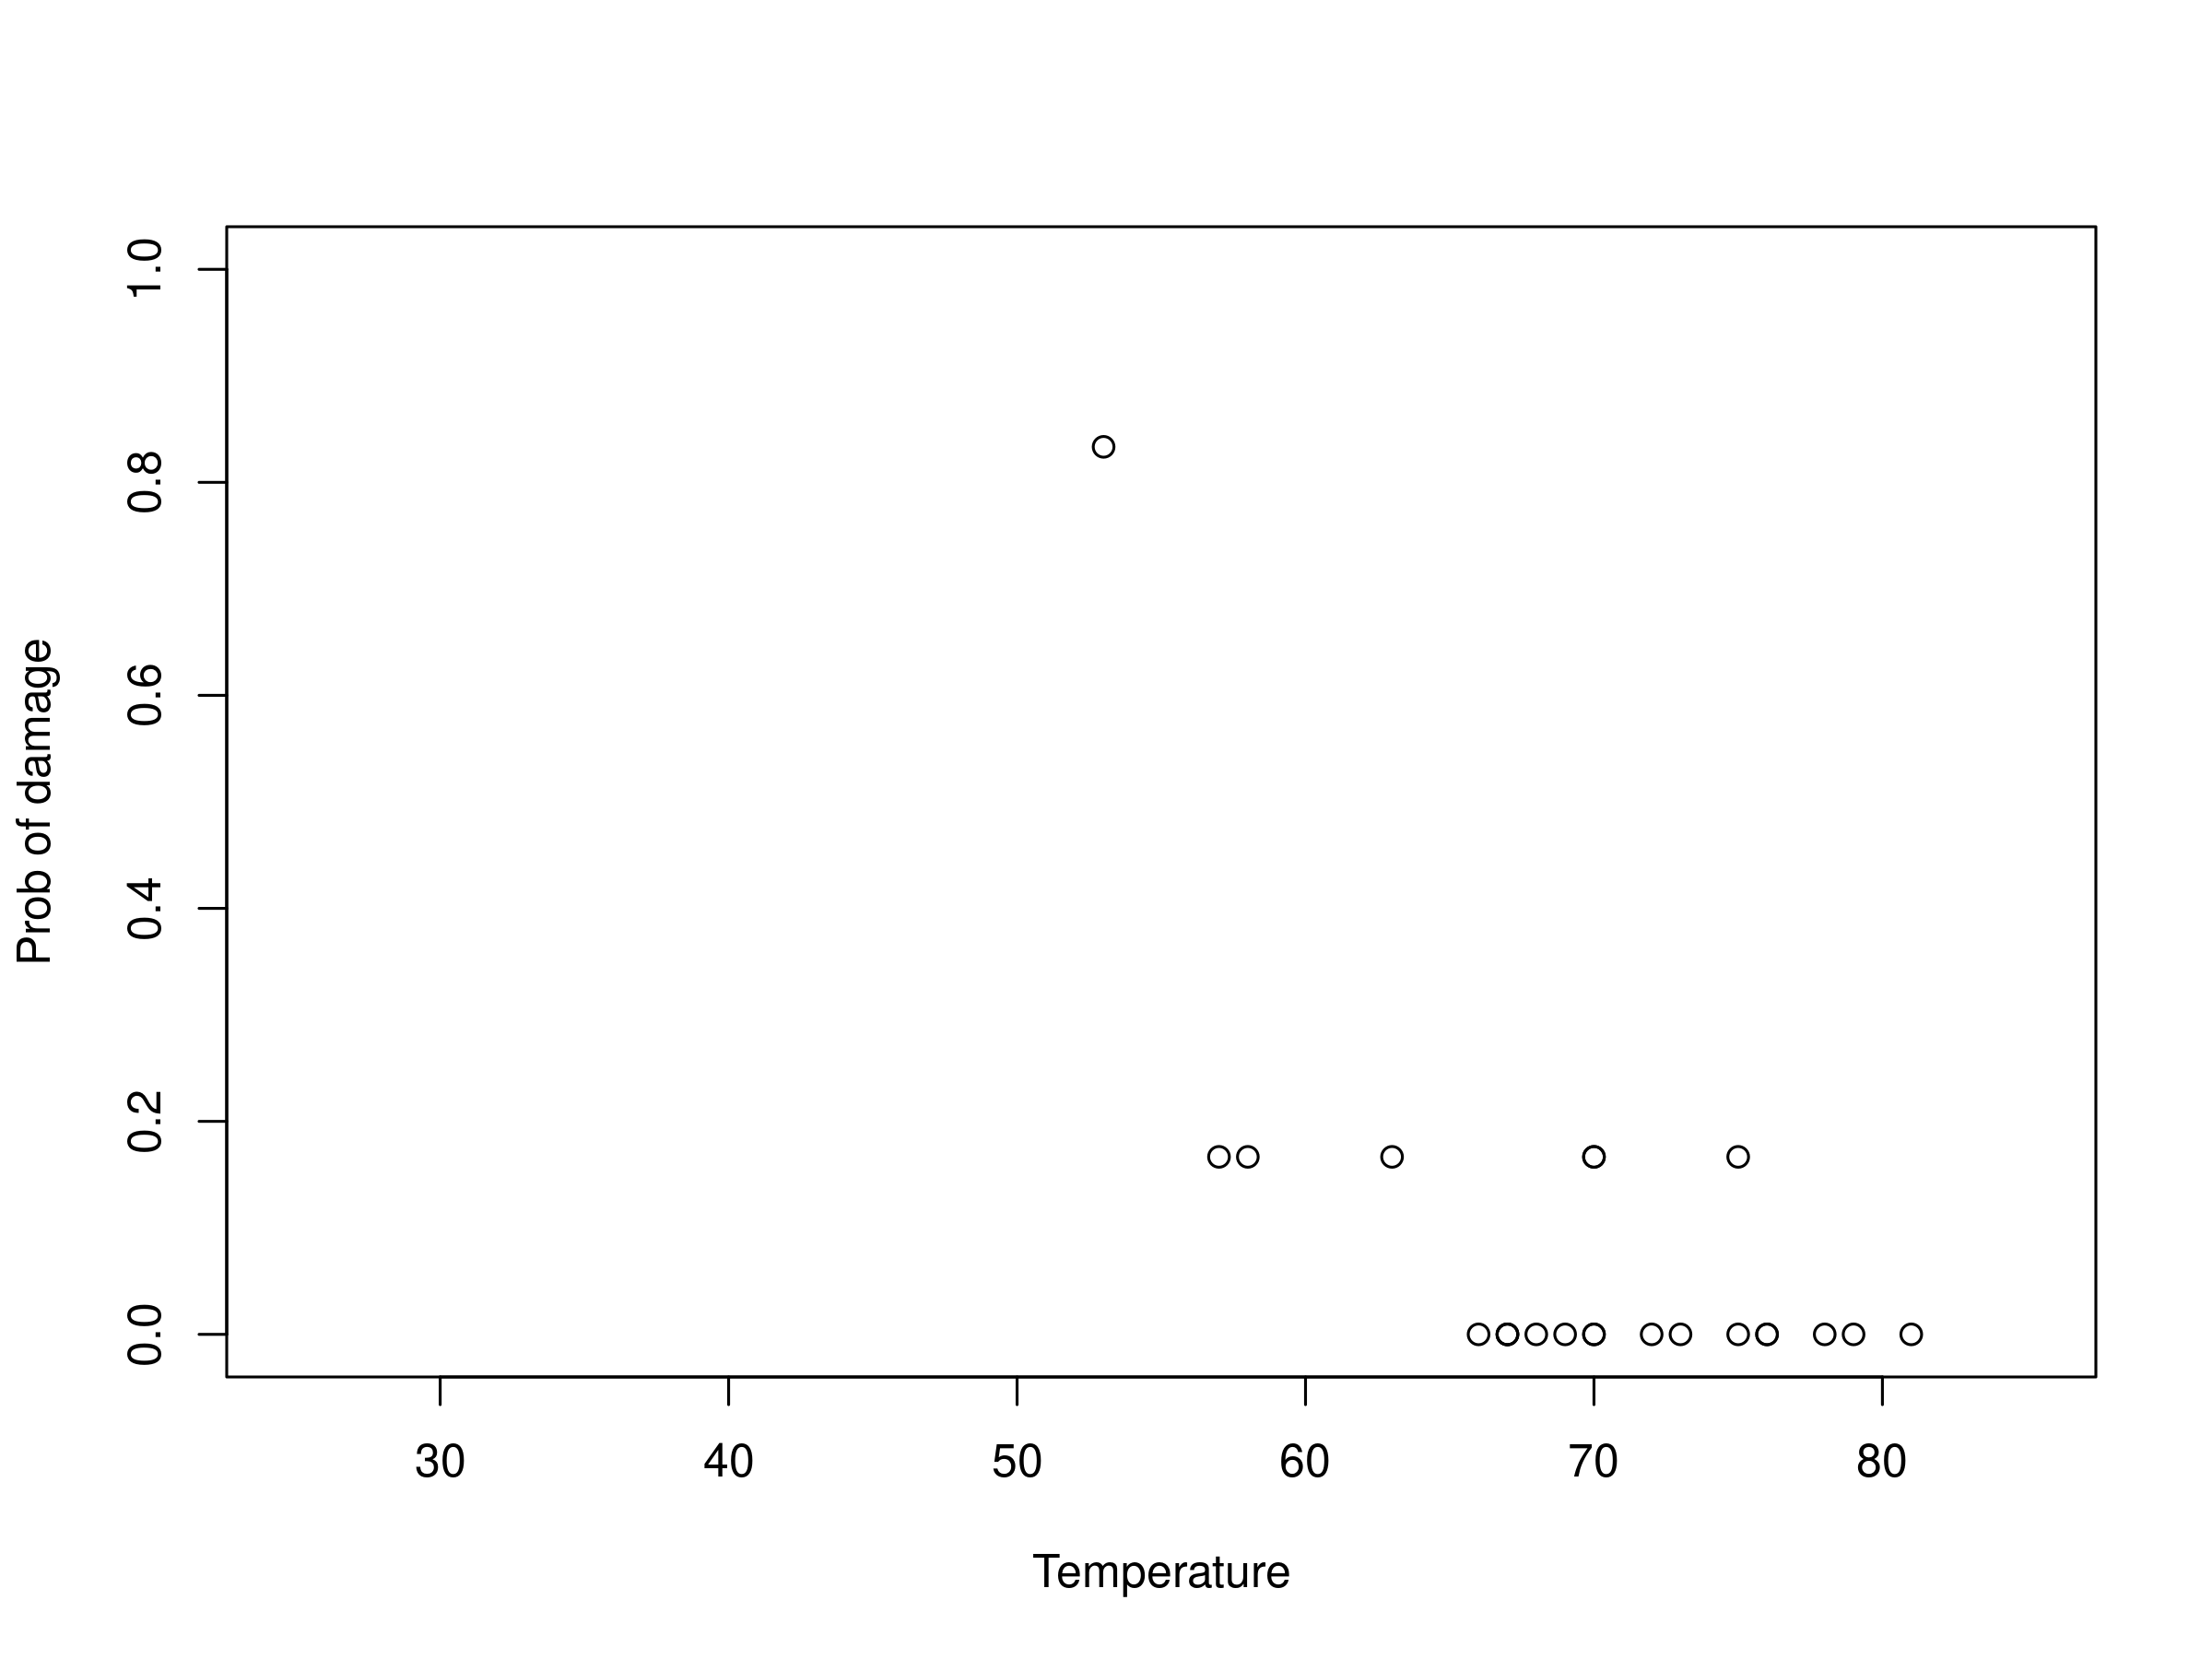

In [7]:
plot(damage/6 ~ temp, orings, xlim=c(25,85), ylim = c(0,1), xlab="Temperature", ylab="Prob of damage")

여기서 O-ring의 이상작동 확률이 **온도**와 어떻게 연관되는지를 살펴보고자 한다.
- 6-damage의 뜻은 이상반응이 없는 것이라는 뜻.

In [8]:
lmod <- glm(cbind(damage,6-damage) ~ temp, family=binomial,orings)
sumary(lmod)

             Estimate Std. Error z value  Pr(>|z|)
(Intercept) 11.662990   3.296263  3.5382 0.0004028
temp        -0.216234   0.053177 -4.0663 4.777e-05

n = 23 p = 2
Deviance = 16.91228 Null Deviance = 38.89766 (Difference = 21.98538) 


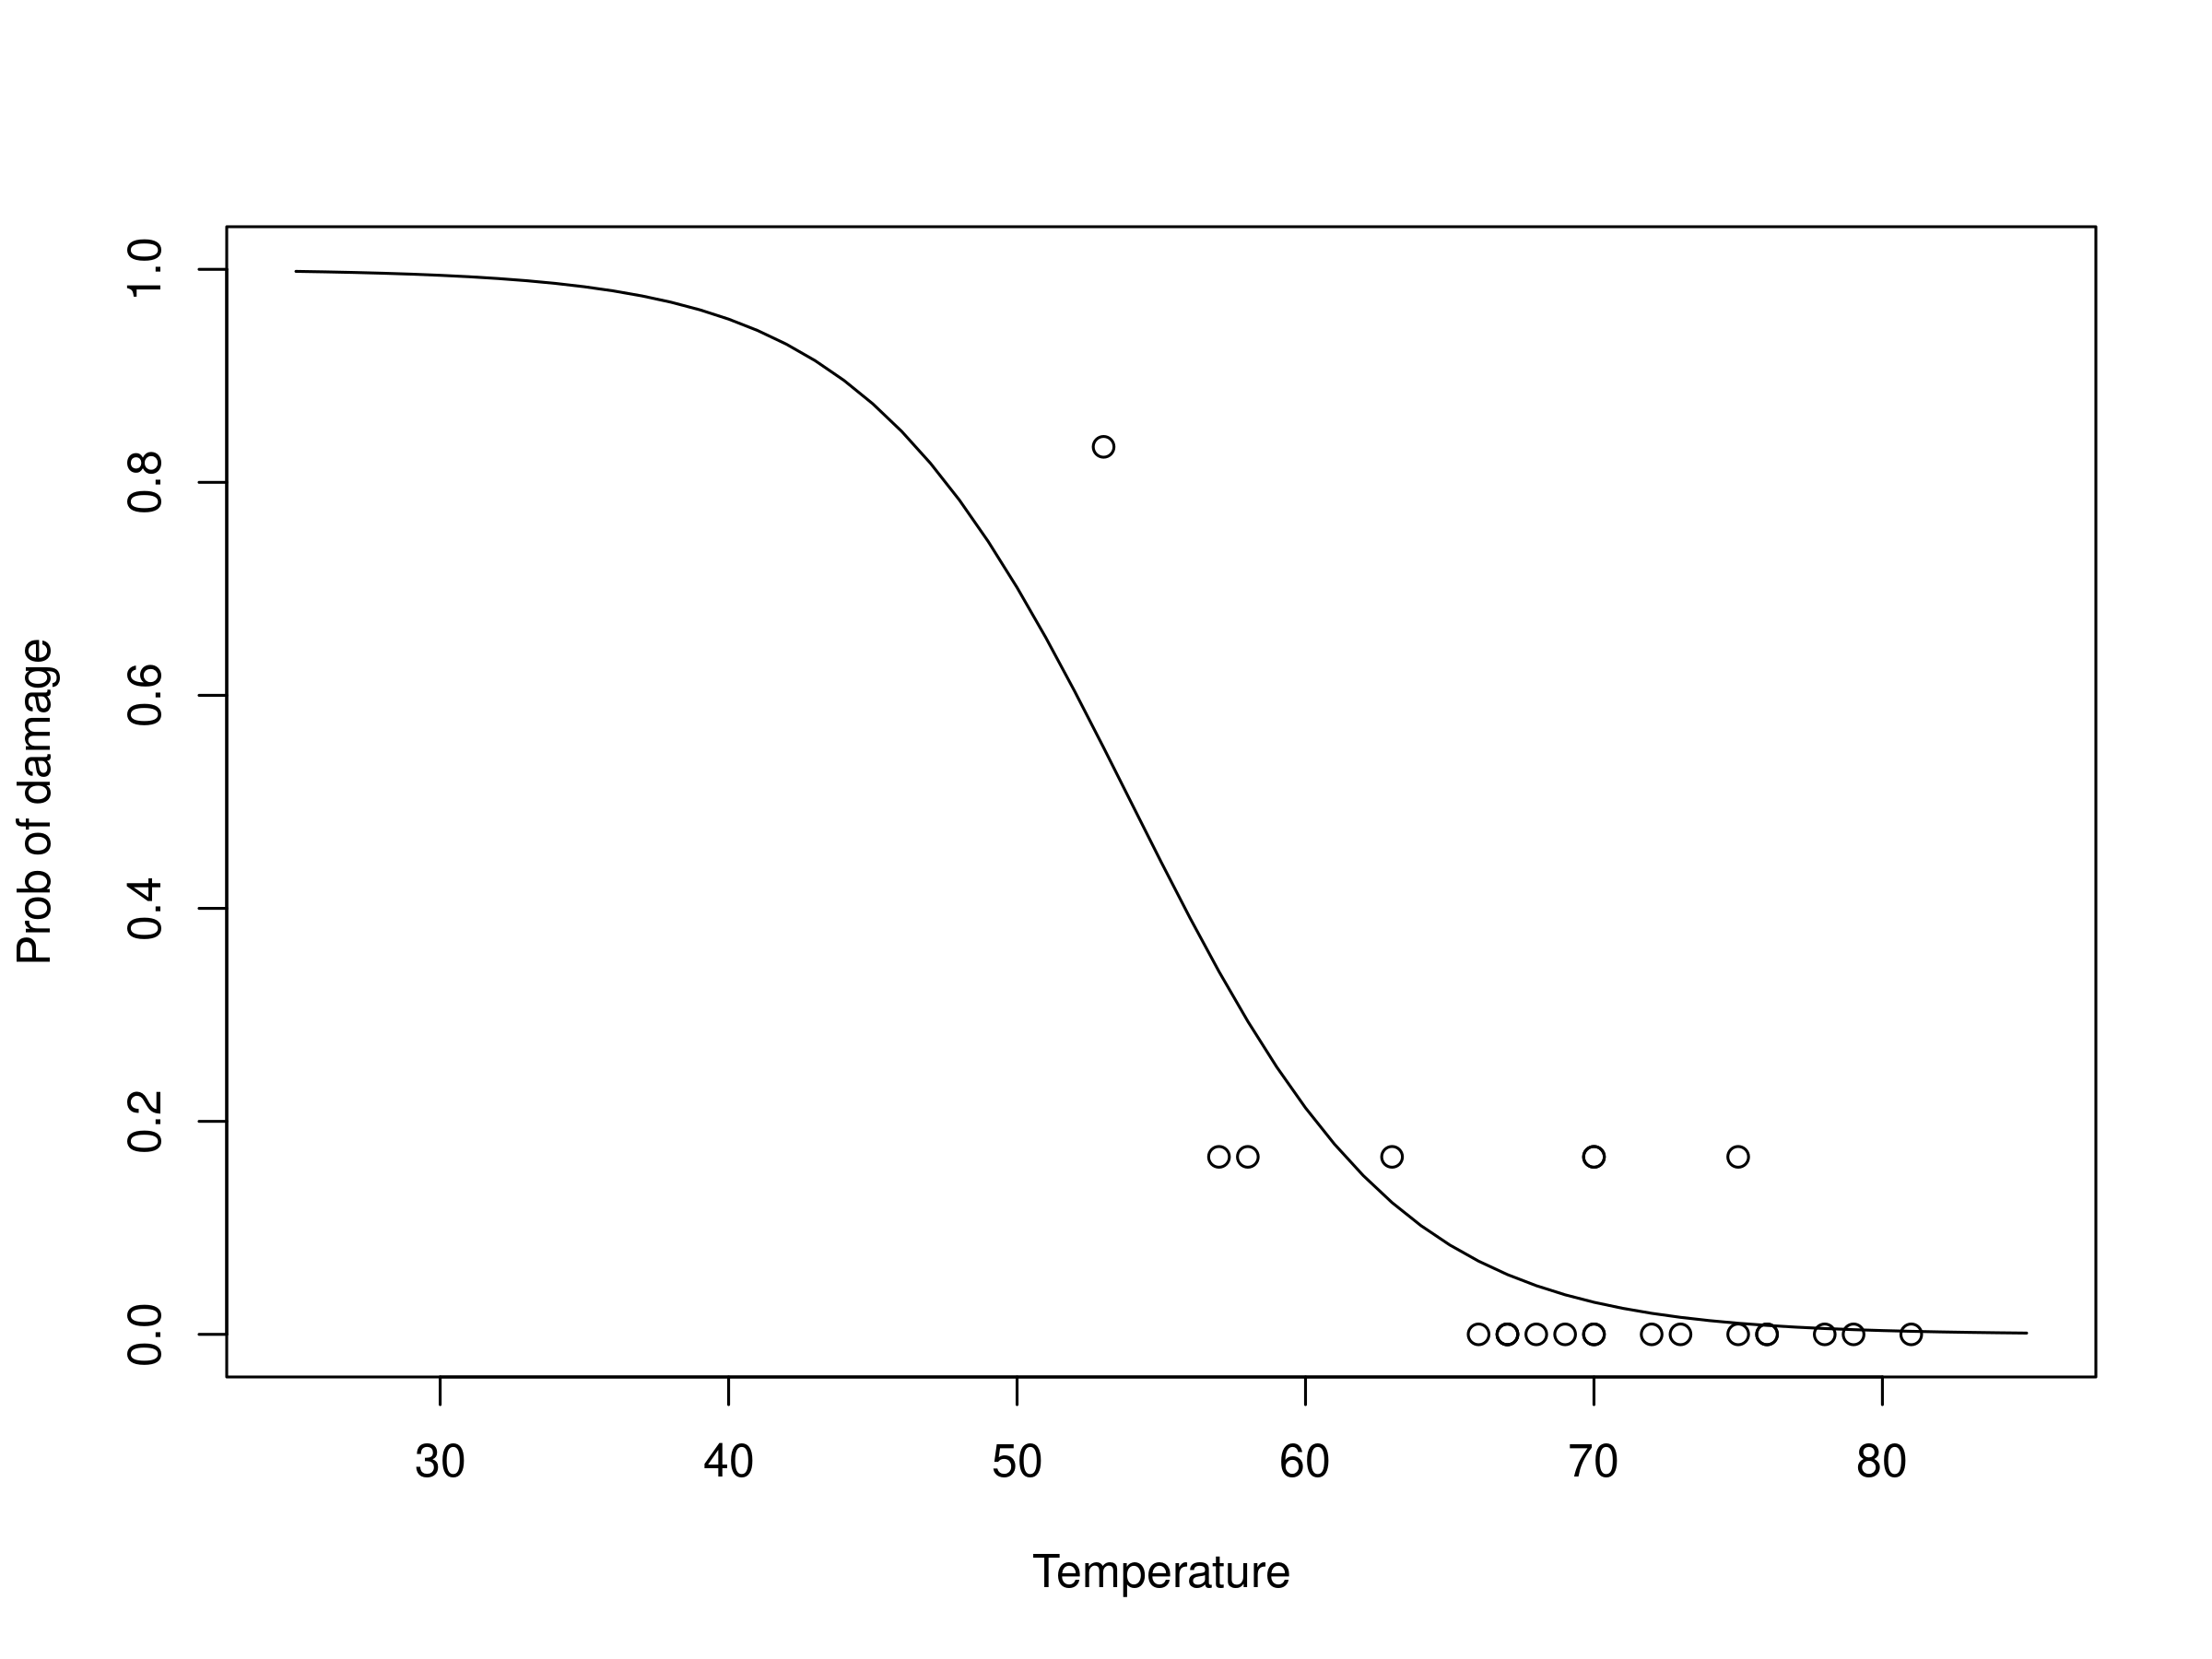

In [9]:
x <- seq(25,85,1)
plot(damage/6 ~ temp, orings, xlim=c(25,85), ylim = c(0,1), xlab="Temperature", ylab="Prob of damage")
lines(x,ilogit(11.6630-0.2162*x))

- 적합된 logistic curve이다.

In [10]:
ilogit(11.6630-0.2162*31)         # estimated probability

[1] 0.9930414

우리는 한번의 발사, 즉 6개의 O-ring에 대한 관측을 하나의 binomial 변수에 대한 관측치로 간주한 셈이다. 만약, 각 O-ring에 대한 관측을 개별적인 관측치로 (즉, binary resposne로) 간주하면 어떻게 되겠는가?

In [11]:
erings <- with(orings, data.frame(temp=rep(temp,each=6), damage=as.vector(sapply(orings$damage, function(x) rep(c(0,1), times=c(6-x,x))))))
head(erings)

,temp,damage
,<dbl>,<dbl>
1,53,0
2,53,1
3,53,1
4,53,1
5,53,1
6,53,1


In [12]:
emod <- glm(damage ~ temp, family=binomial, erings)
sumary(emod)

             Estimate Std. Error z value  Pr(>|z|)
(Intercept) 11.662990   3.296157  3.5384 0.0004026
temp        -0.216234   0.053175 -4.0665 4.773e-05

n = 138 p = 2
Deviance = 54.75942 Null Deviance = 76.74480 (Difference = 21.98538) 


- `Difference`가 `21.98538`으로 같은 모습!
- 모형의 적합도에서는 차이가 중요하다.

In [13]:
confint(lmod)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),5.575195,18.737598
temp,-0.332657,-0.120179


추정치 및 표준오차, 모형의 deviance등 모든 것이 일치함을 확인할 수 있다.

## 2. 분류문제에서의 활용

Binary response 문제는 분류문제에 활용될 수 있다. 기본적으로 $p_i=P(Y_i=1|X_i)$를 모형화하여 추정할 수 있으므로 이 추정확률(혹은 예측확률)을 바탕으로 $\hat{Y}_i∈\{0,1\}$을 얻을 수 있게 된다. 이 때 $\hat{p}_i⟶\hat{Y}_i$ 과정에서는 적절한 cut-off (threshold) 값이 필요하다.

- 주어진 선형 함수에서 event 확률을 적절하게 추정하자.
- cut-off (threshold)에 따라 달라질 수 있다. 즉, 영향을 미친다.
- $\hat{p_i} \in (0,1) \to \hat{Y_i} \in {0,1}$
    - ex) $\hat{p_i} = 0.2 \to 0$
    - 0에 가까우니 0으로 볼래! 하지만 이것은 정해진 것이 아니다.

## 3. 다항로지스틱 모형

response가 셋 이상의 범주로 나타나는 경우도 있다. 예를 들어 어떤 질병에서 환자의 재발여부만을 모형화 하자면 binary response로 생각할 수 있지만 재발부위를 세분화 하여 모형화하고자 한다면 multinomial response를 고려하는 것이 타당하다.

이 경우 $Y_i∼Multi(n,(p_1,p_2,…,p_K)′)$이고 각 $p_i$에 대하여 다음과 같은 모형화를 고려할 수 있다.

$$log\frac{p_j}{p_K}=β_{j0}+∑_{s=1}^{q}β_{js}X_s,  j=1,2,…,K−1$$
- $p_j$는 변화하지만 $p_K$는 고정이다.
- $(q+1) \times (k-1)$ 개의 $\beta$가 존재한다.

위 모형에서 $K$번째 범주가 기준(reference level)으로 설정되었다. 모수의 추정 등은 최대가능도추정법 등을 활용하여 가능하다. 만약 $K=2$이면 **위 모형은 binary response에서의 로지스틱 모형과 일치**한다.

이러한 다항로지스틱 모형은 (이항)로지스틱 모형의 자연스러운 확장으로 볼 수 있으며 다수준을 가지는 분류문제에의 활용도 가능하다.

때로는 다항반응변수의 경우 특정수준을 제외한 다른 수준을 병합하여 binary문제로 바꾸어 모형화 하고, 이러한 방식을 모든 수준에 대해서 반복하는 방식으로 접근하기도 한다.

## 4. Count regression

### 4.1 Poisson regression : most commly used

## 1. Binomial response